# Metal Bands Analysis

In this notebook we analyze a kaggle dataset on metal bands, which comes from the following link: https://www.kaggle.com/datasets/mrpantherson/metal-by-nation?select=metal_bands_2017.csv.

## Data Wrangling and Cleaning

In [163]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [7]:
df = pd.read_csv('metal_bands_2017.csv', encoding='latin-1', index_col=0)

In [8]:
df.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


In [25]:
df['band_name'].value_counts()

Iron Maiden          2
Kamelot              2
Helloween            2
Testament            2
Epica                2
                    ..
Alarum               1
Winter               1
Visceral Bleeding    1
Tremonti             1
Axis Of Despair      1
Name: band_name, Length: 4949, dtype: int64

For some reason some of these bands are showing up here twice. Let'see how many and explore if there is duplicate data.

In [12]:
sum(df['band_name'].value_counts() == 2)

51

So there are 51 bands that show up twice. This only can make sense if they broke up and got back together, effectively giving them two startdates. Let's see if this is the case for any of these bands. Bands that this isn't the case should have their duplicate values removed. We can use the formed column to help us here.

In [30]:
sum(df[['band_name', 'formed']].value_counts()==2)

50

So it looks like there is only one band that has different years for the formed column. Let's get rid of all the other duplicates now.

In [38]:
df1 = df.drop_duplicates(subset=['band_name', 'formed'])

Now let's look at the one band left with two rows.

In [47]:
df1['band_name'].value_counts() == 2

Michael Schenker's Temple Of Rock     True
Balance Of Power                     False
Bombs Of Hades                       False
Bloodway                             False
Blood Farmers                        False
                                     ...  
Blitzkrieg                           False
Blackthorn                           False
Beyond Fear                          False
ASP                                  False
Axis Of Despair                      False
Name: band_name, Length: 4949, dtype: bool

In [43]:
df1[df1['band_name'] == 'Michael Schenker\'s Temple Of Rock']

,band_name,fans,formed,origin,split,style
1713,Michael Schenker's Temple Of Rock,25,1979,Germany,1979,Hard rock
4734,Michael Schenker's Temple Of Rock,1,2011,Germany,-,"Heavy,Hard rock"


After doing some quick google searches, this band doesn't have much information, and the number of fans in the second appearence here is only 1. With these being true, let's just get rid of its second appearence for easier analysis.

In [48]:
df2 = df.drop_duplicates(subset=['band_name'])

Now let's look at null values.

In [94]:
#since we dropped some rows we need to reset the index
df2.reset_index(drop=True, inplace=True)

In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4949 entries, 0 to 4948
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   band_name  4949 non-null   object
 1   fans       4949 non-null   int64 
 2   formed     4949 non-null   object
 3   origin     4941 non-null   object
 4   split      4949 non-null   object
 5   style      4949 non-null   object
dtypes: int64(1), object(5)
memory usage: 232.1+ KB


In [96]:
df2[df2['origin'].isna() == True]

,band_name,fans,formed,origin,split,style
410,Enshine,175,2009,NaN,-,Gothic doom
939,Clouds,61,2013,NaN,2013,Atmospheric doom
1372,Subterranean Masquerade,35,1997,NaN,-,"Progressive,Psychedelic rock"
2564,Twilight Of The Gods,11,2010,NaN,-,Heavy
2946,Archivist,7,2015,NaN,-,"Atmospheric black,Post-metal"
3394,Metallic Taste Of Blood,5,2011,NaN,-,"Progressive,Instrumental"
3891,Level 10,3,2014,NaN,2014,"Heavy,Power"
4151,Death Penalty,2,2013,NaN,2013,"Doom,Heavy"


After some googling, it turns out Enshine is from Sweden. There are multiple bands named Clouds, but none that started in 2013, so unfortunately the origin data can't be found. Subterranean Masquerade is from Israel. Twilight Of The Gods has multiple places of origin. Let's do a value count and pick the one that shows up the most. The choices for this band are: Sweden / Norway / Ireland / United Kingdom.

In [65]:
 df2['origin'].value_counts()

USA                          1123
Sweden                        469
Germany                       392
United Kingdom                339
Finland                       300
                             ... 
Australia, United Kingdom       1
Sweden, Finland                 1
Hungary, United Kingdom         1
Colombia, USA                   1
Greenland                       1
Name: origin, Length: 113, dtype: int64

Okay, so we will simply say that Twilight Of The Gods is from Sweden. Next is Archivist, which also has many places of origin, but most of the members are from Austria, so we will put that. Metallic Taste Of Blood has multiple places of origin as well, one of which is the USA, which has the most occurences so we will add this to that. The same thing is true for Level 10 as well. Death Penalty has only two places of origin, one being Belgium and the other being the UK. We will select the UK because it has more occurences. 

Now we can fix this dataset by adding all these values, although we will just delete the row with the band Clouds since its origin is unknown and it is only one band.

In [109]:
df2.iloc[410, 3] = 'Sweden'
df2.iloc[1372, 3] = 'Israel'
df2.iloc[2564, 3] = 'Sweden'
df2.iloc[2946, 3] = 'Austria'
df2.iloc[3394, 3] = 'USA'
df2.iloc[3891, 3] = 'USA'
df2.iloc[4151, 3] = 'United Kingdom'

In [110]:
df2 = df2[df2['band_name'] != 'Clouds']

In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4948 entries, 0 to 4947
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   band_name  4948 non-null   object
 1   fans       4948 non-null   int64 
 2   formed     4948 non-null   object
 3   origin     4948 non-null   object
 4   split      4948 non-null   object
 5   style      4948 non-null   object
dtypes: int64(1), object(5)
memory usage: 232.1+ KB


Some values in the formed column are also just a '-' sign. This is like a null value, but below you can see there are only 4 of them with not many fans so let's just remove them.

In [136]:
df2[df2['formed'] == '-']

,band_name,fans,formed,origin,split,style
4391,Throes Of Sanity,2,-,USA,-,Us power
4548,Doomocracy,1,-,Greece,-,Doom
4769,Rustless,1,-,Italy,-,Heavy
4896,Weapon UK,1,-,United Kingdom,-,"New wave of british heavy,Heavy"


In [137]:
df2 = df2[df2['formed'] != '-']

#reset index again
df2.reset_index(drop=True, inplace=True)

So now we have no null values. The final cleaning step is to look at the split column. From the rows that we have seen so far, there seem to be an oddly large number of bands that formed and split in the same year. Let's explore how many.

In [138]:
df2[df2['formed'] == df2['split']]

,band_name,fans,formed,origin,split,style
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
5,Slayer,2955,1981,USA,1981,Thrash
7,Dream Theater,2329,1985,USA,1985,Progressive
9,Nightwish,2183,1996,Finland,1996,"Symphonic power,Gothic,Symphonic"
...,...,...,...,...,...,...
4935,Argus (Ro),0,1996,Romania,1996,Black
4937,As I Lay Dying (AUT),0,1991,Austria,1991,"Death,Melodic doom"
4939,Atara,0,2006,France,2006,"Black,Grindcore"
4941,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"


About half of the data has this issue it seems. One can notice some popular bands here, like Megadeth and Slayer, who certainly did not split apart the same year they formed. The split column is probably not going to be useful as it stands, and there are too many datapoints to address individually here if we were to fix the problem manually. Let's just drop the column for now then.

In [139]:
df3 = df2.drop(columns = ['split'])
df3.head(3)

,band_name,fans,formed,origin,style
0,Iron Maiden,4195,1975,United Kingdom,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,"Heavy,Bay area thrash"


## Data Exploration

In [140]:
df3['style'].value_counts()

Black                                         345
Death                                         249
Heavy                                         179
Power                                         146
Progressive                                   144
                                             ... 
Progressive,Psychedelic rock                    1
Progressive,Ambient                             1
Depressive black,Post-metal                     1
Atmospheric black,Drone doom,Neofolk,Noise      1
Avantgarde death                                1
Name: style, Length: 1227, dtype: int64

In [147]:
df3 = df3.astype({'formed': int})

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   band_name  4944 non-null   object
 1   fans       4944 non-null   int64 
 2   formed     4944 non-null   int32 
 3   origin     4944 non-null   object
 4   style      4944 non-null   object
dtypes: int32(1), int64(1), object(3)
memory usage: 173.9+ KB


In [167]:
df_temp = df3[['formed', 'fans']]

#grouping the total number of fans by decade, with some help from:
#https://stackoverflow.com/questions/17764619/pandas-dataframe-group-year-index-by-decade
fans_df = pd.Series(df_temp.groupby((df_temp['formed']//10)*10).sum()['fans'])

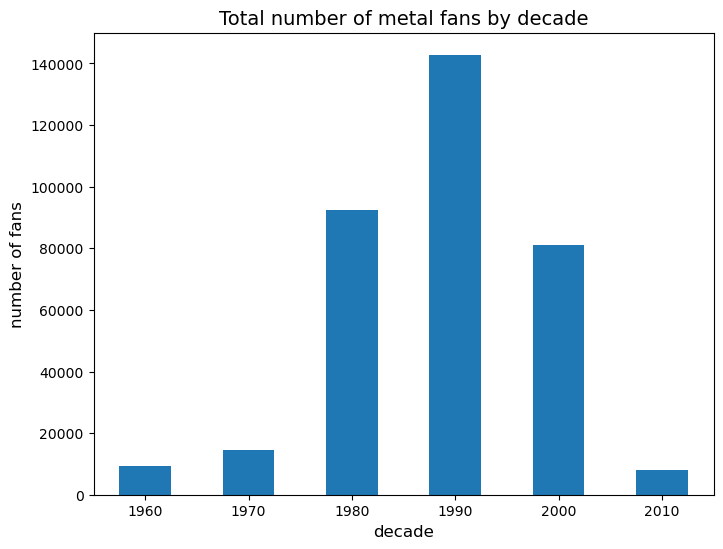

In [214]:
plt.rcParams["figure.figsize"] = (8, 6)

fans_df.plot.bar(rot=0)
plt.title('Total number of metal fans by decade', size=14)
plt.xlabel('decade', size=12)
plt.ylabel('number of fans', size=12)
plt.show()

In [185]:
df_temp2 = df3[['formed', 'style']]

df_temp2.groupby((df_temp2['formed']//10)*10).count()

,formed,style
formed,,
1960,16,16
1970,84,84
1980,504,504
1990,1412,1412
2000,2192,2192
2010,736,736


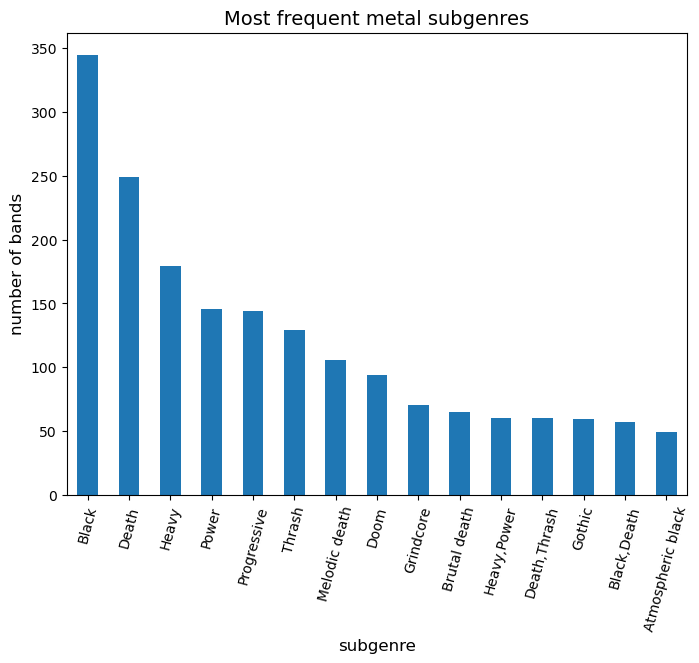

In [216]:
df3['style'].value_counts()[0:15].plot.bar(rot=75)
plt.xlabel('subgenre', size=12)
plt.ylabel('number of bands', size=12)
plt.title('Most frequent metal subgenres', size=14)
plt.show()

So you can see after the 10 or so most popluar subgenres, the rest of the genres start to become mixes of multiple genres, or just weird sub-subgenres. Let's get these bands that have more than one genre or subgenre, and add them to the main sub genres, which would be the top ten here, going from Black metal to Brutal Death metal. These account for a lot of the data, so we will be adding a lot here. We will also allow a band that is two subgenres to be added to both. 

Note for Black, some genres start with the word Blackened, which is typically a subgenre of black metal, so we will let these get couunted towards black metal bands.

In [237]:
#df3[df3['style'].str.contains('Nu')]

In [238]:
#list(df3['style'].unique())

In [250]:
def style_count(band_name):
    band_cnt = df3[df3['style'] == band_name].shape[0]

    for style in df3[df3['style'] != band_name]['style']:
        if band_name in style:
            band_cnt+=1

    return band_cnt

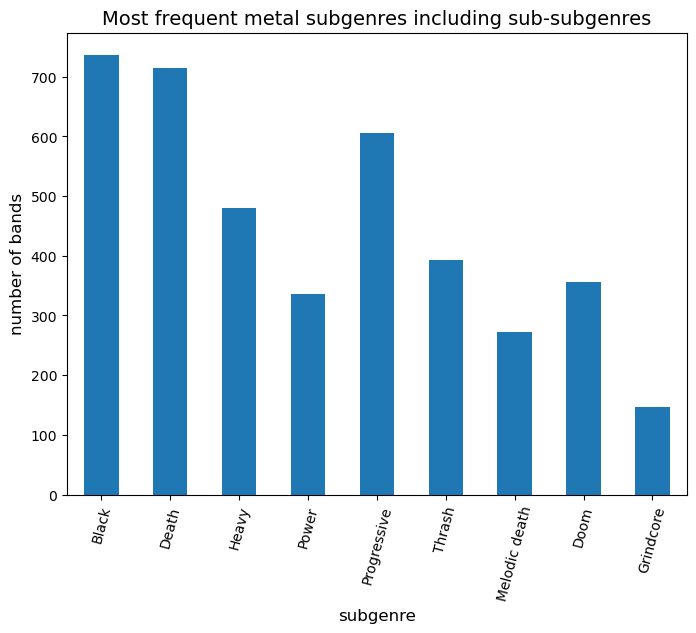

In [267]:
freq_dict = {'Black': style_count('Black'), 
             'Death': style_count('Death'), 
             'Heavy': style_count('Heavy'), 
             'Power': style_count('Power'), 
             'Progressive': style_count('Progressive'), 
             'Thrash': style_count('Thrash'), 
             'Melodic death': style_count('Melodic death'), 
             'Doom': style_count('Doom'), 
             'Grindcore': style_count('Grindcore')}

pd.Series(data=freq_dict).plot.bar(rot=75)
plt.xlabel('subgenre', size=12)
plt.ylabel('number of bands', size=12)
plt.title('Most frequent metal subgenres including sub-subgenres', size=14)
plt.show()